In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [84]:
a = pd.read_csv('train.csv')
b = pd.read_csv('test.csv')
a.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [123]:
Train.to_csv('Cleaned_Train.csv', index=False)
Test.to_csv('Cleaned_Test.csv', index=False)

In [124]:
cleaned_train = pd.read_csv('Cleaned_Train.csv')
cleaned_test = pd.read_csv('Cleaned_Test.csv')

In [125]:
cleaned_train.shape, cleaned_test.shape

((54808, 13), (23490, 13))

In [126]:
X = cleaned_train.drop(['is_promoted', 'employee_id'], axis=1)
y = cleaned_train['is_promoted']
Test_Data = cleaned_test.drop(['is_promoted', 'employee_id'], axis=1)

In [127]:
X.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_m,age_grp
0,1,3,1,35,5.0,8,1,0,49,0,30
1,2,2,1,30,5.0,4,0,0,60,1,20
2,1,2,1,34,3.0,7,0,0,50,1,30
3,1,2,2,39,1.0,10,0,0,50,1,30
4,3,2,1,45,3.0,2,0,0,73,1,40


In [128]:
Test_Data.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_m,age_grp
0,3,2,1,24,3.332219,1,1,0,77,1,20
1,8,2,1,31,3.000000,5,0,0,51,0,30
2,1,2,1,31,1.000000,4,0,0,47,1,30
3,6,2,3,31,2.000000,9,0,0,65,0,30
4,7,2,1,30,4.000000,7,0,0,61,1,20


In [129]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  int64  
 1   education             54808 non-null  int64  
 2   no_of_trainings       54808 non-null  int64  
 3   age                   54808 non-null  int64  
 4   previous_year_rating  54808 non-null  float64
 5   length_of_service     54808 non-null  int64  
 6   KPIs_met >80%         54808 non-null  int64  
 7   awards_won?           54808 non-null  int64  
 8   avg_training_score    54808 non-null  int64  
 9   gender_m              54808 non-null  int64  
 10  age_grp               54808 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 4.6 MB


In [130]:
print(y.value_counts())

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [132]:
#sm = SMOTE(random_state=12)
#X_train, y_train = sm.fit_sample(X_train_orginal, y_train_orginal)

In [133]:
#cv = StratifiedKFold(n_splits=10, shuffle=True)

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [134]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train) 
rf_model_preds = rf_model.predict(X_test)

In [135]:
print(f1_score(y_test, rf_model_preds))

0.46718903036238985


In [136]:
rf_cm = confusion_matrix(y_test, rf_model_preds)

In [137]:
def generate_confusion_matrix(cm):
    
    group_names  = ['True Positive','False Positive','False Negative','True Negative']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(10, 7))
    ax= plt.subplot()
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No - Not Promoted', 'Yes - Promoted']); ax.yaxis.set_ticklabels(['No - Not Promoted','Yes - Promoted']);

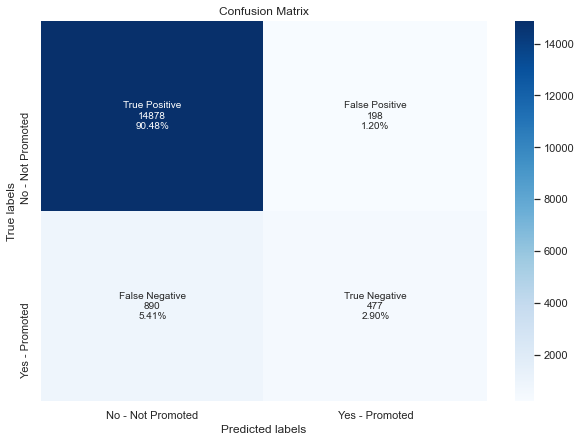

In [138]:
generate_confusion_matrix(rf_cm)

In [139]:
cv = RepeatedStratifiedKFold(n_splits=10, random_state=123)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [140]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [141]:
rf_rscv_model = RandomizedSearchCV(estimator = rf_model, param_distributions=random_grid, n_iter = 30, cv = 5, 
                               verbose=2, random_state=42)

rf_rscv_model.fit(X_train,y_train)
print(rf_rscv_model.best_estimator_)
print(rf_rscv_model.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30, total=  14.5s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.4s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30, total=  14.6s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30, total=  15.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30, total=  16.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=30, total=  16.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=  16.5s
[CV] n_estimators=900, min_samples_split=

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  19.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  18.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  19.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  20.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  19.7s
[CV] n_estimators=900, min_samples

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=25, total=  22.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total=  10.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total=  10.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total=  10.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total=  11.2s
[CV] n_estimators=1000, min_sampl

[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30, total=   6.1s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30, total=   6.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20, total=   6.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20, total=   6.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=20, total=   6.4s
[CV] n_estimators=300, min_samples_split=2,

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 31.4min finished


RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_split=10,
                       n_estimators=600)
0.9371562622181676


In [142]:
rf_rscv_model_1 = RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_split=10,
                       n_estimators=600)

In [143]:
rf_rscv_model_1.fit(X_train, y_train) 
rf_rscv_model_1_preds = rf_rscv_model_1.predict(X_test)

In [144]:
print(f1_score(y_test, rf_rscv_model_1_preds))

0.4744842562432139


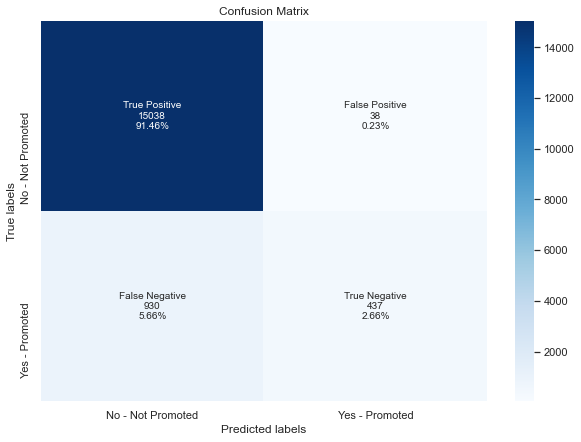

In [145]:
generate_confusion_matrix(confusion_matrix(y_test, rf_rscv_model_1_preds))

In [146]:
import pickle

In [148]:
#random forest cv model picklet
pickle.dump(rf_rscv_model_1, open('rf_rscv_model_1.pkl', 'wb'))

# XGBoost

In [149]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_test)

In [150]:
print(f1_score(y_test, xgb_preds))

0.5109261186264308


In [151]:
xgb_cm = confusion_matrix(y_test, xgb_preds)

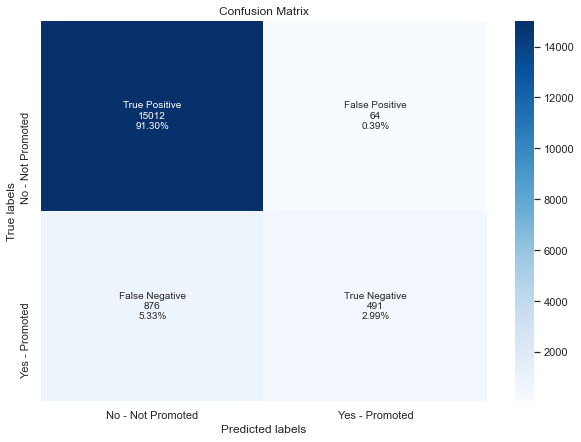

In [152]:
generate_confusion_matrix(xgb_cm)

In [154]:
xgb_param= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100],
           'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

xgb_cv_model_1 = RandomizedSearchCV(estimator = xgb_clf, param_distributions=xgb_param, 
                                  n_iter = 30, cv = 5, verbose=2, random_state=42)
xgb_cv_model_1.fit(X_train,y_train)
print(f'The best value of Alpha and Learning Rate is: {xgb_cv_model_1.best_params_}')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] learning_rate=0.0001, alpha=0.0001 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=0.0001, alpha=0.0001, total=   0.7s
[CV] learning_rate=0.0001, alpha=0.0001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ............... learning_rate=0.0001, alpha=0.0001, total=   0.7s
[CV] learning_rate=0.0001, alpha=0.0001 ..............................
[CV] ............... learning_rate=0.0001, alpha=0.0001, total=   0.8s
[CV] learning_rate=0.0001, alpha=0.0001 ..............................
[CV] ............... learning_rate=0.0001, alpha=0.0001, total=   0.7s
[CV] learning_rate=0.0001, alpha=0.0001 ..............................
[CV] ............... learning_rate=0.0001, alpha=0.0001, total=   0.8s
[CV] learning_rate=0.3, alpha=0.0001 .................................
[CV] .................. learning_rate=0.3, alpha=0.0001, total=   0.8s
[CV] learning_rate=0.3, alpha=0.0001 .................................
[CV] .................. learning_rate=0.3, alpha=0.0001, total=   0.7s
[CV] learning_rate=0.3, alpha=0.0001 .................................
[CV] .................. learning_rate=0.3, alpha=0.0001, total=   0.8s
[CV] learning_rate=0.3, alpha=0.0001 .................................
[CV] .

[CV] ..................... learning_rate=0.01, alpha=10, total=   1.0s
[CV] learning_rate=0.001, alpha=0.01 .................................
[CV] .................. learning_rate=0.001, alpha=0.01, total=   0.9s
[CV] learning_rate=0.001, alpha=0.01 .................................
[CV] .................. learning_rate=0.001, alpha=0.01, total=   0.9s
[CV] learning_rate=0.001, alpha=0.01 .................................
[CV] .................. learning_rate=0.001, alpha=0.01, total=   1.0s
[CV] learning_rate=0.001, alpha=0.01 .................................
[CV] .................. learning_rate=0.001, alpha=0.01, total=   1.0s
[CV] learning_rate=0.001, alpha=0.01 .................................
[CV] .................. learning_rate=0.001, alpha=0.01, total=   1.0s
[CV] learning_rate=0.1, alpha=0.0001 .................................
[CV] .................. learning_rate=0.1, alpha=0.0001, total=   1.0s
[CV] learning_rate=0.1, alpha=0.0001 .................................
[CV] .

[CV] ..................... learning_rate=0.2, alpha=100, total=   1.0s
[CV] learning_rate=0.2, alpha=100 ....................................
[CV] ..................... learning_rate=0.2, alpha=100, total=   1.0s
[CV] learning_rate=0.2, alpha=100 ....................................
[CV] ..................... learning_rate=0.2, alpha=100, total=   1.0s
[CV] learning_rate=0.001, alpha=0.003 ................................
[CV] ................. learning_rate=0.001, alpha=0.003, total=   0.9s
[CV] learning_rate=0.001, alpha=0.003 ................................
[CV] ................. learning_rate=0.001, alpha=0.003, total=   1.0s
[CV] learning_rate=0.001, alpha=0.003 ................................
[CV] ................. learning_rate=0.001, alpha=0.003, total=   1.0s
[CV] learning_rate=0.001, alpha=0.003 ................................
[CV] ................. learning_rate=0.001, alpha=0.003, total=   0.9s
[CV] learning_rate=0.001, alpha=0.003 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.4min finished


The best value of Alpha and Learning Rate is: {'learning_rate': 0.1, 'alpha': 1}


In [162]:
#https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/
xgb_param2 = {'learning_rate' : [0.1],
             'n_estimators':[500, 1000, 2000, 3000, 4000],
             'max_depth':[4,5,6],
             'min_child_weight':[4,5,6],
             'colsample_bytree':[0.5,0.7],
             'reg_alpha':[1],
             'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

In [163]:
xgb_cv_model_2 = RandomizedSearchCV(estimator = xgb_clf, param_distributions=xgb_param2, 
                                  n_iter = 30, cv = 5, 
                                  verbose=2, random_state=42)

xgb_cv_model_2.fit(X_train,y_train)
print(xgb_cv_model_2.best_estimator_)
print(xgb_cv_model_2.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg_lambda=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_lambda=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7, total=   6.0s
[CV] reg_lambda=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  reg_lambda=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7, total=   6.1s
[CV] reg_lambda=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7 
[CV]  reg_lambda=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7, total=   6.3s
[CV] reg_lambda=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7 
[CV]  reg_lambda=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7, total=   6.7s
[CV] reg_lambda=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7 
[CV]  reg_lambda=0.8, reg_alpha=1, n_estimators=1000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7, total=   8.0s
[CV] reg_lambda=0.0001, reg_alpha=1, n_estimators=3

[CV]  reg_lambda=1, reg_alpha=1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.1, colsample_bytree=0.7, total=   4.0s
[CV] reg_lambda=1, reg_alpha=1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.1, colsample_bytree=0.7 
[CV]  reg_lambda=1, reg_alpha=1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.1, colsample_bytree=0.7, total=   4.0s
[CV] reg_lambda=1, reg_alpha=1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.1, colsample_bytree=0.7 
[CV]  reg_lambda=1, reg_alpha=1, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.1, colsample_bytree=0.7, total=   4.0s
[CV] reg_lambda=0.8, reg_alpha=1, n_estimators=4000, min_child_weight=6, max_depth=6, learning_rate=0.1, colsample_bytree=0.7 
[CV]  reg_lambda=0.8, reg_alpha=1, n_estimators=4000, min_child_weight=6, max_depth=6, learning_rate=0.1, colsample_bytree=0.7, total=  21.2s
[CV] reg_lambda=0.8, reg_alpha=1, n_estimators=4000, min_child_wei

[CV]  reg_lambda=1, reg_alpha=1, n_estimators=4000, min_child_weight=6, max_depth=4, learning_rate=0.1, colsample_bytree=0.5, total=  14.3s
[CV] reg_lambda=1, reg_alpha=1, n_estimators=4000, min_child_weight=6, max_depth=4, learning_rate=0.1, colsample_bytree=0.5 
[CV]  reg_lambda=1, reg_alpha=1, n_estimators=4000, min_child_weight=6, max_depth=4, learning_rate=0.1, colsample_bytree=0.5, total=  18.4s
[CV] reg_lambda=1, reg_alpha=1, n_estimators=3000, min_child_weight=6, max_depth=5, learning_rate=0.1, colsample_bytree=0.5 
[CV]  reg_lambda=1, reg_alpha=1, n_estimators=3000, min_child_weight=6, max_depth=5, learning_rate=0.1, colsample_bytree=0.5, total=  17.2s
[CV] reg_lambda=1, reg_alpha=1, n_estimators=3000, min_child_weight=6, max_depth=5, learning_rate=0.1, colsample_bytree=0.5 
[CV]  reg_lambda=1, reg_alpha=1, n_estimators=3000, min_child_weight=6, max_depth=5, learning_rate=0.1, colsample_bytree=0.5, total=  17.1s
[CV] reg_lambda=1, reg_alpha=1, n_estimators=3000, min_child_weig

[CV]  reg_lambda=0.01, reg_alpha=1, n_estimators=500, min_child_weight=4, max_depth=5, learning_rate=0.1, colsample_bytree=0.5, total=   3.7s
[CV] reg_lambda=0.0001, reg_alpha=1, n_estimators=2000, min_child_weight=5, max_depth=4, learning_rate=0.1, colsample_bytree=0.5 
[CV]  reg_lambda=0.0001, reg_alpha=1, n_estimators=2000, min_child_weight=5, max_depth=4, learning_rate=0.1, colsample_bytree=0.5, total=  10.5s
[CV] reg_lambda=0.0001, reg_alpha=1, n_estimators=2000, min_child_weight=5, max_depth=4, learning_rate=0.1, colsample_bytree=0.5 
[CV]  reg_lambda=0.0001, reg_alpha=1, n_estimators=2000, min_child_weight=5, max_depth=4, learning_rate=0.1, colsample_bytree=0.5, total=  11.0s
[CV] reg_lambda=0.0001, reg_alpha=1, n_estimators=2000, min_child_weight=5, max_depth=4, learning_rate=0.1, colsample_bytree=0.5 
[CV]  reg_lambda=0.0001, reg_alpha=1, n_estimators=2000, min_child_weight=5, max_depth=4, learning_rate=0.1, colsample_bytree=0.5, total=  10.0s
[CV] reg_lambda=0.0001, reg_alpha

[CV]  reg_lambda=0.001, reg_alpha=1, n_estimators=2000, min_child_weight=5, max_depth=5, learning_rate=0.1, colsample_bytree=0.5, total=  10.9s
[CV] reg_lambda=0.0001, reg_alpha=1, n_estimators=4000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7 
[CV]  reg_lambda=0.0001, reg_alpha=1, n_estimators=4000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7, total=  21.0s
[CV] reg_lambda=0.0001, reg_alpha=1, n_estimators=4000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7 
[CV]  reg_lambda=0.0001, reg_alpha=1, n_estimators=4000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7, total=  22.3s
[CV] reg_lambda=0.0001, reg_alpha=1, n_estimators=4000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7 
[CV]  reg_lambda=0.0001, reg_alpha=1, n_estimators=4000, min_child_weight=5, max_depth=6, learning_rate=0.1, colsample_bytree=0.7, total=  18.4s
[CV] reg_lambda=0.0001, reg_alp

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 31.3min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.9411964029714583


In [164]:
print(xgb_cv_model_2.best_estimator_)
print(xgb_cv_model_2.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.9411964029714583


In [165]:
xgb_clf_model_3 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain',  learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_clf_model_3.fit(X_train,y_train)
xgb_clf_model_3_preds = xgb_clf_model_3.predict(X_test)

In [167]:
print(f1_score(y_test, xgb_clf_model_3_preds))

0.5107951553449184


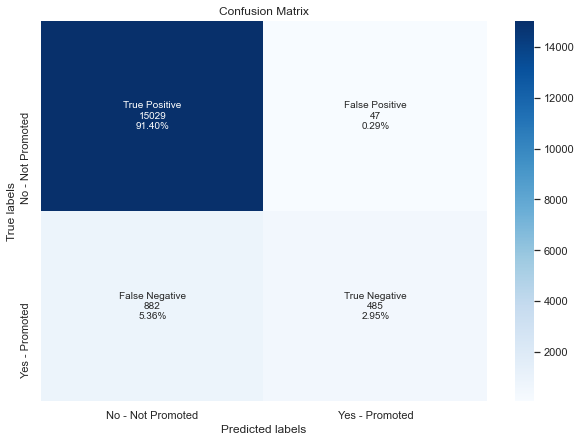

In [169]:
generate_confusion_matrix(confusion_matrix(y_test, xgb_clf_model_3_preds))

In [170]:
#random forest cv model picklet
pickle.dump(xgb_clf_model_3, open('xgb_clf_model_3.pkl', 'wb'))

# Stacking

In [185]:
from mlxtend.classifier import StackingClassifier

In [187]:
stack_clf = StackingClassifier(classifiers=[xgb_clf_model_3,rf_rscv_model_1], 
                           meta_classifier=xgb_clf, use_features_in_secondary=True)

In [188]:
stack_clf_model =stack_clf.fit(X_train, y_train.ravel())
stacking_preds = stack_clf_model.predict(X_test)

In [189]:
print(f1_score(y_test, stacking_preds))

0.5042105263157894


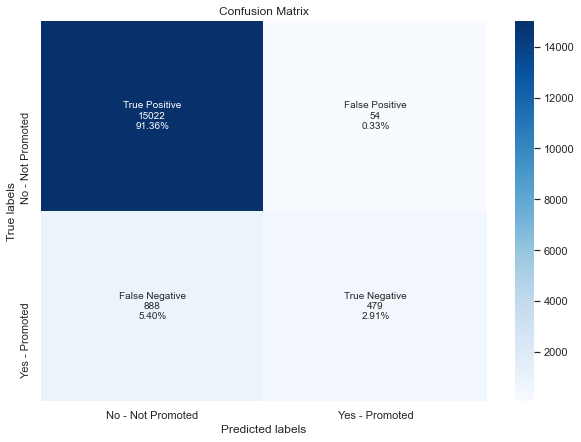

In [190]:
generate_confusion_matrix(confusion_matrix(y_test, stacking_preds))

# Inference

In [191]:
Test_Data.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_m,age_grp
0,3,2,1,24,3.332219,1,1,0,77,1,20
1,8,2,1,31,3.000000,5,0,0,51,0,30
2,1,2,1,31,1.000000,4,0,0,47,1,30
3,6,2,3,31,2.000000,9,0,0,65,0,30
4,7,2,1,30,4.000000,7,0,0,61,1,20


### XGBoost Inference

In [194]:
test_xgb_preds = xgb_clf_model_3.predict(Test_Data)
x = b.copy()

In [195]:
x['is_promoted'] = test_xgb_preds

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0.0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0.0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0.0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0.0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0.0


In [196]:
final1 = x[['employee_id', 'is_promoted']]
final1['is_promoted'] = final1['is_promoted'].astype(int)

C:\Users\joekhaung\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [197]:
final1.to_csv('xgb_preds_with_hyper_labelencoder.csv', index = False)

### Random Forest

In [198]:
test_rf_rscv_preds = rf_rscv_model_1.predict(Test_Data)
r = b.copy()

In [199]:
r['is_promoted'] = test_rf_rscv_preds

In [200]:
final2 = r[['employee_id', 'is_promoted']]
final2['is_promoted'] = final2['is_promoted'].astype(int)

C:\Users\joekhaung\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [201]:
final2.to_csv('rf_preds_with_hyper_labelencoder.csv', index = False)